In [62]:
import pandas as pd
import numpy as np

from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn import model_selection

from sklearn.metrics import confusion_matrix 

import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./dataset/tirages.csv", index_col=[0])
df.shape

(7047, 147)

In [3]:
df.drop(['index'], axis=1, inplace=True)

In [4]:
df.head(5)

,num0,num1,num2,num3,num4,chance,f_1,fc_1,f_2,fc_2,...,num3_dec_2,num3_dec_3,num3_dec_4,chance_dec_3,num4_dec_0,num4_dec_1,num4_dec_2,num4_dec_3,num4_dec_4,chance_dec_4
0,31,15,33,27,36,34,1,1,1,1,...,1,0,0,1,0,0,0,1,0,0
1,10,26,42,1,4,31,0,2,2,2,...,0,0,0,1,1,0,0,0,0,0
2,44,16,47,10,15,27,1,3,3,3,...,0,0,0,0,0,1,0,0,0,0
3,2,3,35,13,1,49,0,4,0,4,...,0,0,0,0,1,0,0,0,0,1
4,30,22,11,9,23,49,1,5,1,5,...,0,0,0,0,0,0,1,0,0,1


In [5]:
#data = df.iloc[:,4:13]
target = df[['num0']] # , 'num1', 'num2', 'num3', 'num4', 'chance'

In [6]:
target.head()

,num0
0,31
1,10
2,44
3,2
4,30


In [8]:
data = df.iloc[:,6:]

In [9]:
data.head()

,f_1,fc_1,f_2,fc_2,f_3,fc_3,f_4,fc_4,f_5,fc_5,...,num3_dec_2,num3_dec_3,num3_dec_4,chance_dec_3,num4_dec_0,num4_dec_1,num4_dec_2,num4_dec_3,num4_dec_4,chance_dec_4
0,1,1,1,1,1,1,1,1,1,1,...,1,0,0,1,0,0,0,1,0,0
1,0,2,2,2,2,2,0,2,2,2,...,0,0,0,1,1,0,0,0,0,0
2,1,3,3,3,3,3,1,3,3,3,...,0,0,0,0,0,1,0,0,0,0
3,0,4,0,4,0,4,2,4,4,4,...,0,0,0,0,1,0,0,0,0,1
4,1,5,1,5,1,5,3,5,5,5,...,0,0,0,0,0,0,1,0,0,1


In [10]:
 X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=66)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6342, 140) (705, 140) (6342, 1) (705, 1)


#### Standardisation

In [16]:
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

In [17]:
print(X_train_scaled.mean(axis=0))
 
print(X_train_scaled.std(axis=0))

[-1.00833879e-16 -2.07269641e-17 -7.61855977e-17  2.01667758e-17
 -7.39448448e-17  1.01674162e-16  1.68056465e-17 -2.63288462e-17
 -6.05003275e-17  2.35279052e-17  7.03036214e-17  5.60188218e-17
  7.39448448e-17  6.49818333e-17  7.89865387e-17  6.49818333e-17
  2.32478110e-17 -1.00833879e-16  1.48449878e-17  8.54287033e-17
 -1.12037644e-18  4.59354339e-17 -6.44216451e-17 -2.91297873e-17
  1.17639526e-17  5.48984454e-17 -2.52084698e-17  1.68056465e-17
 -1.09796891e-16 -1.28843290e-17 -6.94633390e-17  3.92131753e-18
 -8.85097385e-17  4.14539281e-17 -1.93264935e-17  9.52319971e-18
  2.57686580e-17 -2.35279052e-17 -4.36946810e-17  1.12037644e-18
 -1.12037644e-17 -3.58520460e-17  3.80927988e-17  3.13705402e-17
 -2.29677169e-17  3.86529870e-17  3.58520460e-17 -3.19307284e-17
 -1.17639526e-17  1.17639526e-17  5.82595747e-17  2.91297873e-17
  2.91297873e-17  0.00000000e+00  8.96301149e-18  8.96301149e-18
 -2.63288462e-17 -5.93799511e-17  8.96301149e-18  1.40047055e-17
 -2.91297873e-17  3.86529

In [15]:
X_test_scaled = scaler.transform(X_test)
 
print(X_test_scaled.mean(axis=0))
# [ 0.02776704  0.02592492 -0.03078587 -0.03137977 -0.00471876 -0.04413827
#  -0.02414174 -0.00293273 -0.00467444 -0.10894663  0.01043391]
 
print(X_test_scaled.std(axis=0))

[-0.04763789 -0.029904    0.05555389 -0.07368607 -0.07004976 -0.02944018
 -0.02513349 -0.04044533  0.04699041 -0.01527325 -0.02083252 -0.04873175
 -0.01894258 -0.054122   -0.02846826 -0.01171551  0.06258809 -0.03530069
 -0.04252187 -0.02896122 -0.03321338  0.07104967  0.08686663  0.0708969
 -0.04142218  0.06977228 -0.00053699  0.07470801  0.04757986  0.071311
 -0.02374176  0.0717408  -0.00038843  0.06783907 -0.06729183  0.07395501
  0.08245427  0.0744153   0.02753729  0.07135644  0.01114666  0.07196201
 -0.15380442  0.06995508  0.02246994  0.07357695 -0.00152856  0.0706554
 -0.01876174  0.06935342  0.09880929  0.06677908  0.05299455  0.07301105
  0.0005841   0.06904129  0.01487776  0.0705159   0.12926397  0.06764952
 -0.02478962  0.07228125  0.0283917   0.07254183  0.05735814  0.06834694
  0.02062835  0.07032652  0.02109779  0.06813139  0.00091476  0.07235142
  0.02012032  0.06878008  0.07147175  0.07084672  0.00245119  0.07005413
 -0.04762117  0.07014683 -0.01072702  0.07029758 -0.024

les variables normalisées dans l'échantillon de test ne sont pas parfaitement centrées en zéro et de variance égale à 1, car nous transformons l'ensemble de test en utilisant les moyennes de l'ensemble d'apprentissage, et non pas de l'ensemble de test lui-même.

### SVM

In [21]:
svm_clf = svm.SVC(gamma=0.01,  kernel='poly')
svm_clf.fit(X_train_scaled, y_train.values.ravel())

SVC(gamma=0.01, kernel='poly')

In [54]:
y_pred = svm_clf.predict(X_test_scaled)
pd.crosstab(y_test['num0'].to_numpy(), y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
Classe réelle,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,6,2,4,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,3,2,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,3,1,2,0,1,4,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,2,3,0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,2,2,2,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,3,5,0,4,4,1,2,0,...,0,0,0,0,0,0,0,0,0,0
7,3,1,3,4,1,4,2,4,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,3,1,0,1,0,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,2,2,1,2,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
svm_cm = confusion_matrix(y_test,y_pred)

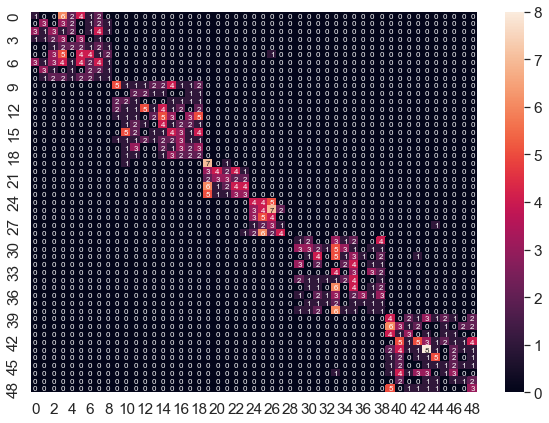

In [61]:
df_cm = pd.DataFrame(svm_cm, range(49), range(49))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}) # font size

plt.show()

In [55]:
parametres = {'C':[0.1,1,10],'kernel':['rbf','linear', 'poly'], 'gamma':[0.001, 0.1, 0.5]}

In [58]:
grid_clf = model_selection.GridSearchCV(estimator=svm_clf, param_grid=parametres)

In [67]:
grille = grid_clf.fit(X_train_scaled,y_train.values.ravel())

In [68]:
print(grid_clf.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


In [69]:
#Prédiction des features test et création de la matrice de confusion
y_pred = grid_clf.predict(X_test_scaled)
pd.crosstab(y_test['num0'].to_numpy(), y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
Classe réelle,,,,,,,,,,,,,,,,,,,,,
1,11,0,0,2,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,7,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,8,1,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,6,1,1,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,5,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,3,0,1,2,4,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
7,4,2,3,2,2,1,6,1,2,0,...,0,0,0,0,0,0,0,0,0,0
8,4,1,0,0,0,3,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,2,1,2,1,0,0,1,5,0,...,0,0,0,0,0,0,0,0,0,0


#### Courbe d'apprentissage du modèle

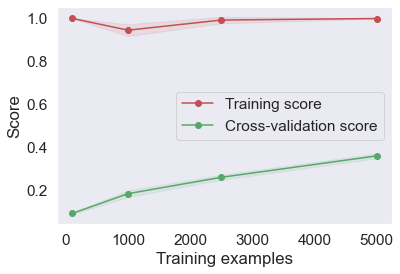

In [77]:
from sklearn.model_selection import learning_curve

%matplotlib inline 

train_sizes, train_scores, valid_scores = learning_curve(svm.SVC(kernel='linear', C= 1), X_train_scaled, y_train.values.ravel(), train_sizes=[50, 100, 1000, 2500, 5000], cv=5)

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes=[50, 100, 1000, 2500, 5000]

train_sizes, train_scores, test_scores = learning_curve(
    grid_clf, X_train_scaled, y_train.values.ravel(), n_jobs=4, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

Il faudrait plus de tirages pour voir si ça continue à monter